In [33]:
%load_ext autoreload
%autoreload 1
%aimport data
from data import *
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Boring sample graph

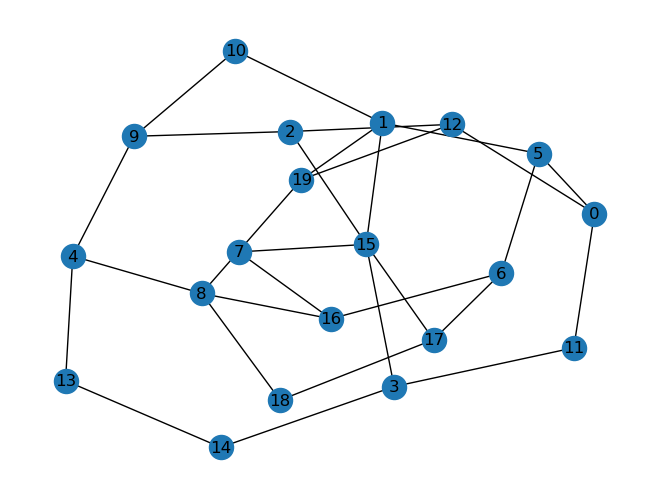

In [35]:
NUM_RAND_EDGES = 10 # 50
NUM_VERTICES = 20 # 100
g = torch_geometric.utils.to_networkx(generate_hampath_graph(NUM_VERTICES, NUM_RAND_EDGES), to_undirected=True)  # type: ignore
nx.draw_kamada_kawai(g, with_labels = True)  # type: ignore

In [19]:
# Generate dataset
NUM_GRAPHS = 10
NUM_VERTS = 8
DELTA_V = 2
NUM_EDGES = 5
DELTA_E = 2
PATH = 'data'
generate_and_save_corpus(NUM_GRAPHS, NUM_VERTS, DELTA_V, NUM_EDGES, DELTA_E, PATH)

Generating graphs...


100%|██████████| 10/10 [00:00<00:00, 348.81it/s]


torch.Size([10, 10])


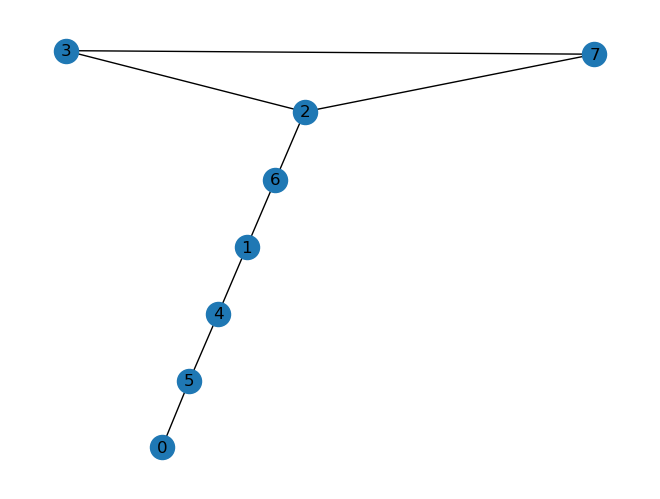

In [36]:
# Load dataset
graphs = load_corpus('data')
print(graphs[1].x.size())
nx.draw_kamada_kawai(torch_geometric.utils.to_networkx(graphs[0], to_undirected=True), with_labels=True)  # type: ignore


In [39]:
from main import *
import torch

from tqdm import tqdm
from itertools import count
from data import load_corpus
from model import DeepHamModel, DeepHamLoss
from torch.distributions import Categorical
from GraphState import GraphState, Reward

DATA_PATH = './data'
LEARNING_RATE = 0.001
N_EPISODES = 1
N_GRAPHS = 1

/usr/local/anaconda3/envs/csci1470/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/Users/jrr6/Library/CloudStorage/OneDrive-Personal/Brown/CSCI1470/deep_learning_py/deepham/model.py:110: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_losses.append(F.smooth_l1_loss(value, torch.tensor([dr])))


tensor([[2, 1, 0, 0, 1, 0, 4, 2, 1, 2, 3, 4],
        [4, 2, 1, 2, 3, 4, 2, 1, 0, 0, 1, 0]])
loss = f38.073448181152344;	path = [4, 1]


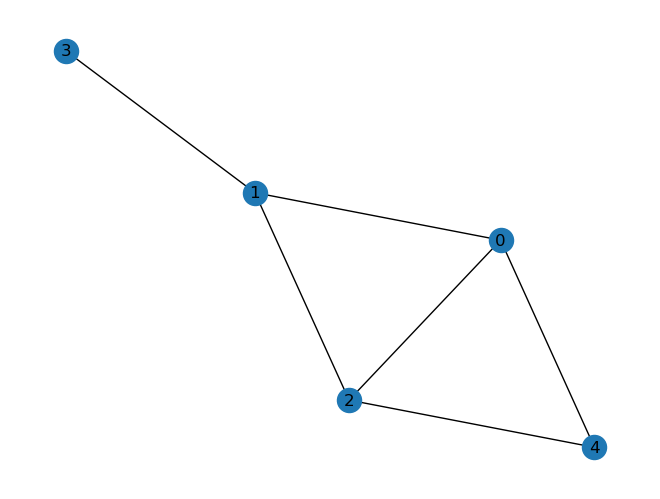

In [49]:
def new_main():
    # corpus = load_corpus(DATA_PATH)

    model = DeepHamModel()
    criterion = DeepHamLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # for graph in corpus[0:1]:
    for _ in range(N_GRAPHS):
        env = GraphState(None)
        for _ in range(N_EPISODES):
            graph = env.graph.clone()  # type: ignore
            print(graph.edge_index)
            loss = run_episode(model, env, optimizer, criterion)
            nx.draw_kamada_kawai(torch_geometric.utils.to_networkx(graph, to_undirected=True), with_labels=True) # type: ignore
            print(f"loss = f{loss.item()};\tpath = {env.path}")
new_main()